In [1]:
%matplotlib inline
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
plt.rcParams["axes.labelsize"] = 15

# Load

In [2]:
df = pd.read_csv('Data/heart.csv')

# Data Overview

In [3]:
df.head(2)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1


In [4]:
df.shape

(299, 13)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,299.0,60.833893,11.894809,40.0,51.0,60.0,70.0,95.0
anaemia,299.0,0.431438,0.496107,0.0,0.0,0.0,1.0,1.0
creatinine_phosphokinase,299.0,581.839465,970.287881,23.0,116.5,250.0,582.0,7861.0
diabetes,299.0,0.418060,0.494067,0.0,0.0,0.0,1.0,1.0
ejection_fraction,299.0,38.083612,11.834841,14.0,30.0,38.0,45.0,80.0
high_blood_pressure,299.0,0.351171,0.478136,0.0,0.0,0.0,1.0,1.0
platelets,299.0,263358.029264,97804.236869,25100.0,212500.0,262000.0,303500.0,850000.0
serum_creatinine,299.0,1.393880,1.034510,0.5,0.9,1.1,1.4,9.4
serum_sodium,299.0,136.625418,4.412477,113.0,134.0,137.0,140.0,148.0
sex,299.0,0.648829,0.478136,0.0,0.0,1.0,1.0,1.0


In [7]:
nan_cols = df.isna().sum()
nan_cols[nan_cols>0]

Series([], dtype: int64)

* No NaN values

## Fix Column Names

In [8]:
df.columns = [col.lower().strip() for col in df.columns]

# EDA

## Age Distrubtion by Sex

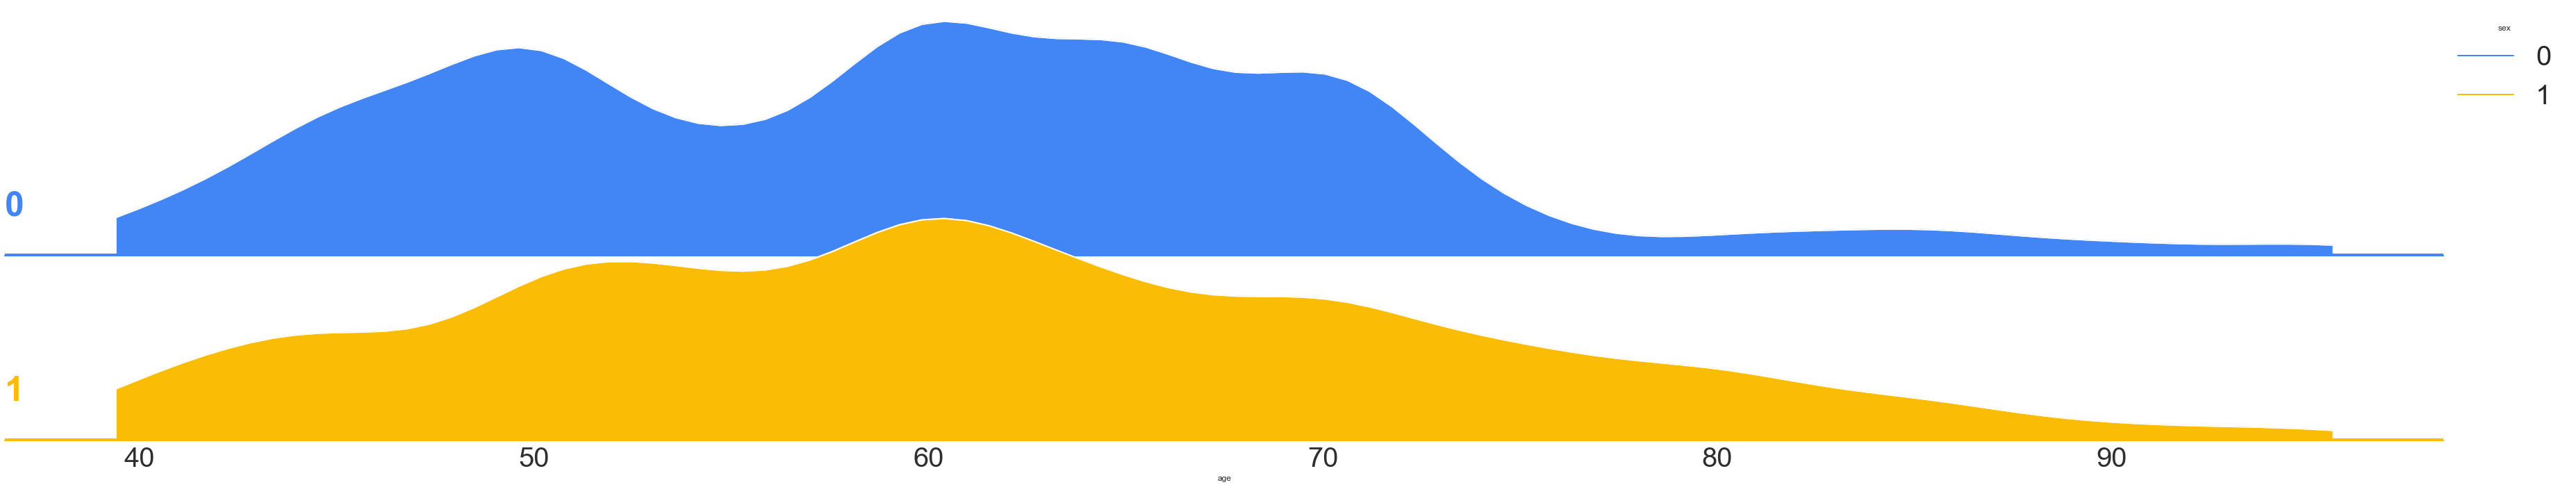

In [9]:
sns.set(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})
# Set up FacetGrid
g = sns.FacetGrid(df,
                  row="sex",
                  hue="sex",
                  aspect=10,
                  height=5,
                  palette=['#4285F4', '#FBBC05'],     
                 )
# Map Plot and Plot Shape (outline)
g.map(sns.kdeplot, "age", clip_on=False, shade=True, alpha=1, lw=1.5, bw=.2)
g.map(sns.kdeplot, "age", clip_on=False, color="w", lw=2, bw=.2)

# X-Axis properties
g.map(plt.axhline, y=0, lw=6)
g.map(plt.xticks, fontsize=40, color='#2F2F2F')
g.map(plt.axhline, y=0, lw=2, clip_on=False)

g.map(plt.axhline, y=0, lw=2, clip_on=False)
g.fig.subplots_adjust(hspace= -.20)


# Define and use a simple function to label the plot in axes coordinates
def label(x, color, label):
    ax = plt.gca()
    ax.text(0, .2, label, fontweight="bold", color=color, size=50,
            ha="left", va="center", transform=ax.transAxes)

g.map(label, "age")

# Set the subplots to overlap
g.fig.subplots_adjust(hspace=-.25)

# Remove axes details that don't play well with overlap
g.set_titles("")
g.set(yticks=[])
g.despine(bottom=True, left=True)
g.add_legend(loc= 'upper right', fontsize=40)

plt.show()

## Overall Distribution

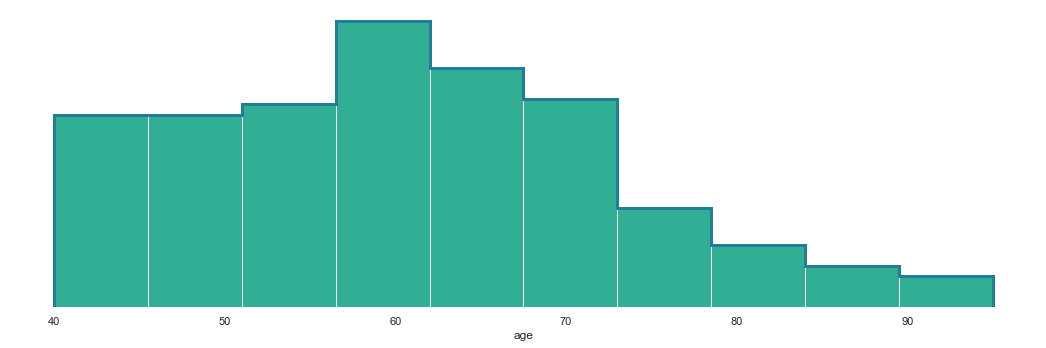

In [10]:
g1 = sns.FacetGrid(df,
                  aspect=3,
                  height=5,
                 )
g1.map(sns.distplot, 'age', kde=False, hist_kws={"alpha": 1, "color": "#31AF94", 'edgecolor': "w"})
g1.map(sns.distplot, 'age', kde=False, hist_kws={"alpha": 1, "edgecolor": "#247D96", "histtype": "step", "linewidth": 3})


g1.despine(bottom=True, left=True)
g1.set(yticks=[])

plt.show()

## Smoking and High Blood Pressure

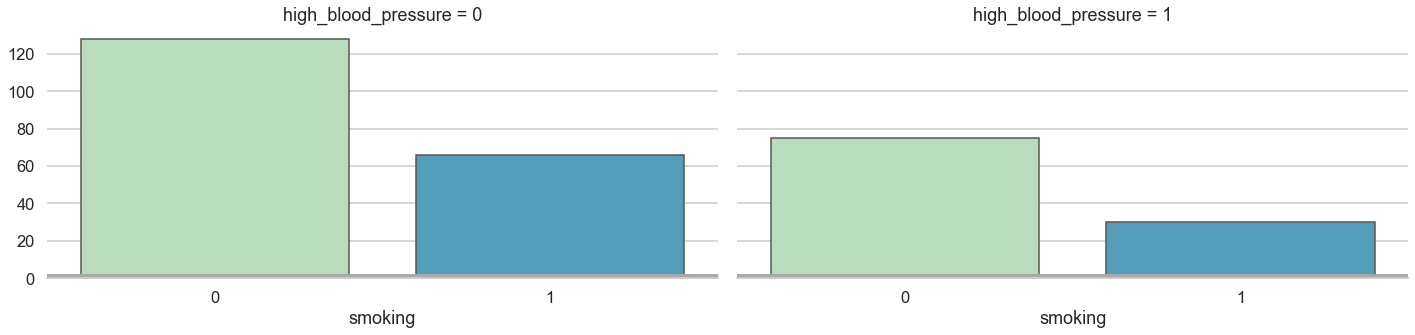

In [11]:
sns.set(style="whitegrid", rc={"axes.facecolor": (0, 0, 0, 0)}, context='talk')

g = sns.FacetGrid(df,
                  col='high_blood_pressure',
                  aspect=2,
                  height=5,
                  margin_titles=True,
                 )

g.map(plt.axhline, y=0, lw=8, color='darkgrey')
g.map(sns.countplot, 'smoking', order=[0, 1], palette='GnBu', edgecolor='#57534F')
g.despine(bottom=False, left=True)

plt.show()

## Death distribution based on sex

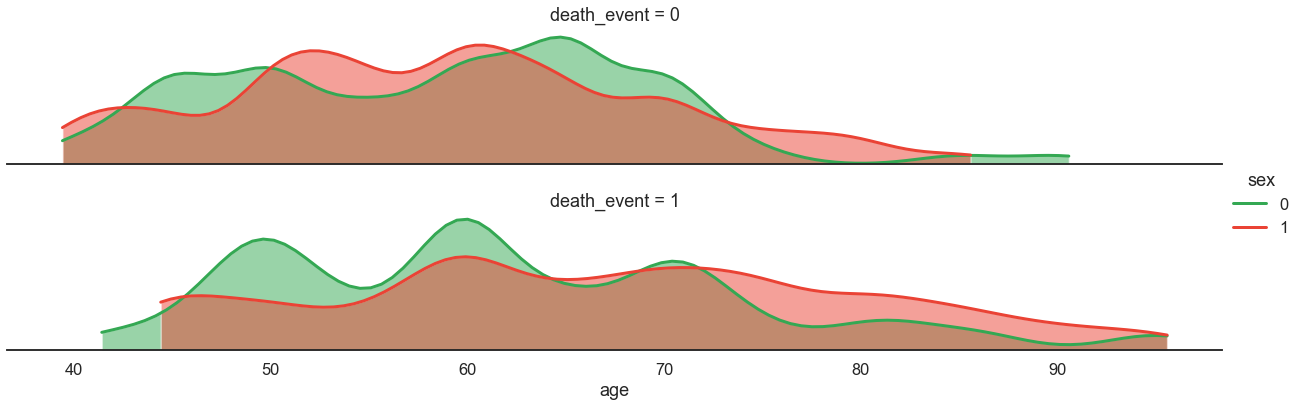

In [12]:
sns.set(style="white", rc={"axes.facecolor": (0, 0, 0, 0)}, context='talk')

g = sns.FacetGrid(df,
                  row='death_event',
                  hue='sex',
                  aspect=6,
                  height=3,
                  palette=['#34A853', '#EA4335'],     
                 )

g.map(sns.kdeplot, 'age', shade=True, alpha=0.5, lw=1.5, bw=0.2)
g.map(sns.kdeplot, 'age', lw=3, bw=0.2)

g.despine(bottom=False, left=True)
g.set(yticks=[])
g.add_legend()


plt.show()

## Diabetes/Age

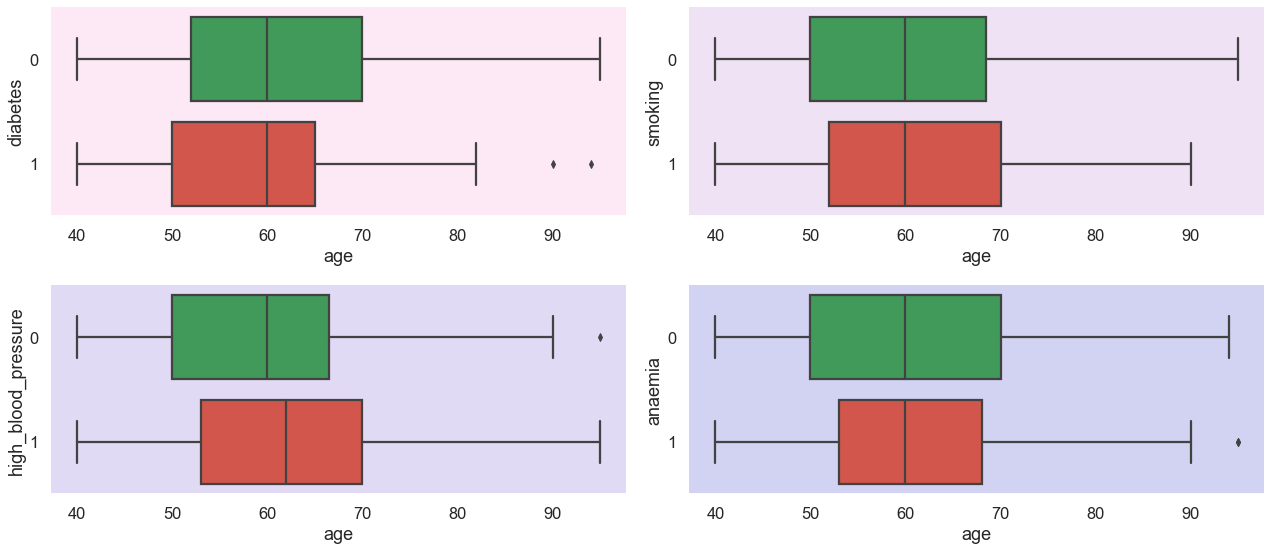

In [13]:
sns.set_context("talk")
f = plt.figure(figsize=(18, 8))
gs = f.add_gridspec(2, 2)

with sns.axes_style("dark", {"axes.facecolor": "#FDE9F5"}):
    ax = f.add_subplot(gs[0, 0])
    sns.boxplot('age', 'diabetes', data=df, orient='h', palette={0:'#34A853', 1:'#EA4335'})

with sns.axes_style("dark", {"axes.facecolor": "#EFE2F4"}):
    ax = f.add_subplot(gs[0, 1])
    sns.boxplot('age', 'smoking', data=df, orient='h', palette={0:'#34A853', 1:'#EA4335'})

with sns.axes_style("dark", rc={"axes.facecolor": "#E1DAF4"}):
    ax = f.add_subplot(gs[1, 0])
    sns.boxplot('age', 'high_blood_pressure', data=df, orient='h', palette={0:'#34A853', 1:'#EA4335'})

with sns.axes_style("dark", rc={"axes.facecolor": "#D2D3F3"}):
    ax = f.add_subplot(gs[1, 1])
    sns.boxplot('age', 'anaemia', data=df, orient='h', palette={0:'#34A853', 1:'#EA4335'})

sns.despine(left=True)

f.tight_layout()

* Diabetes tends to have a significant influence on age
* Smoking and Anaemia have little influence on age
* High blood pressure seem to not affect the age

## Distribution Ejection Fraction & Platelets

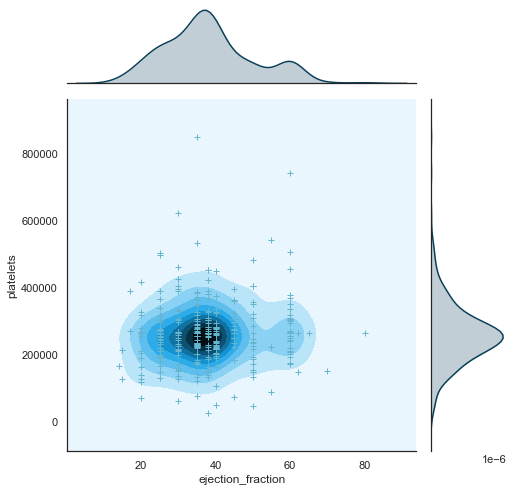

In [14]:
sns.set_context(context='notebook')
j = sns.jointplot(x='ejection_fraction', y='platelets', ratio=4, height=7, data=df, kind='kde',color='#093E58')
j.plot_joint(plt.scatter, c="c", s=40, linewidth=1, marker="+")
plt.show()

## Serum Sodium & Serum Creatinine

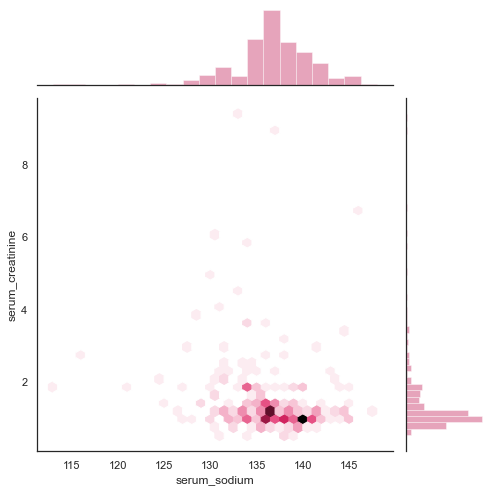

In [15]:
sns.jointplot(x='serum_sodium', y='serum_creatinine', ratio=4, height=7,data=df, kind='hex',color='#C11C55')
plt.tight_layout()
plt.show()

## Survived vs Dead

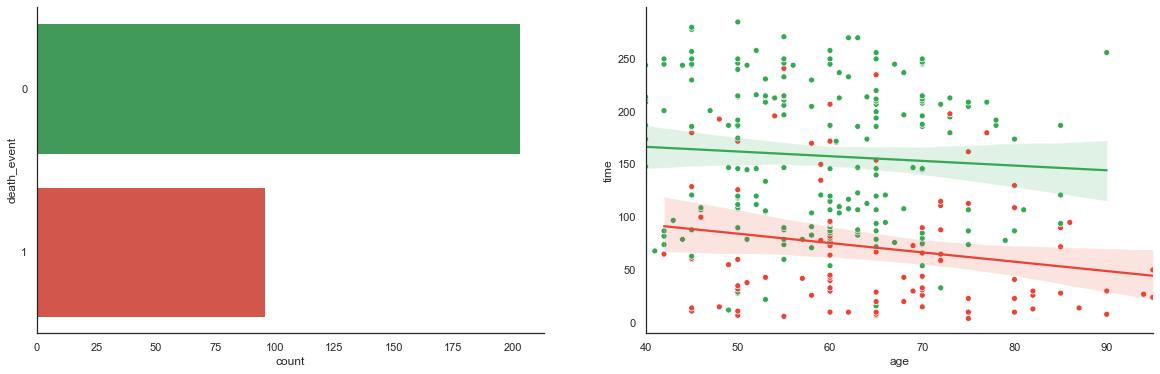

In [16]:
fig, axs = plt.subplots(1, 2, figsize=(20,6))
sns.countplot(y='death_event', data=df, ax=axs[0], palette={0: '#34A853', 1:'#EA4335'})
sns.scatterplot(x='age', y='time', data=df, hue=df['death_event'].to_list(), palette={0: '#34A853', 1:'#EA4335'}, ax=axs[1], legend=False)
sns.regplot(x='age', y='time',data=df[df['death_event']==0], ax=axs[1], color='#34A853', scatter_kws={"s": 0})
sns.regplot(x='age', y='time',data=df[df['death_event']==1], ax=axs[1], color='#EA4335',scatter_kws={"s": 0})
sns.despine(left=False)
plt.show()

* Deaths happen only half as often - 
    * In a later step we will sample this data set so that each class contains the same number of data points
* Most people tend to die roughly in the first 100 days
* Older people are monitored less days
* Older people tend to die in less days

## Correlations

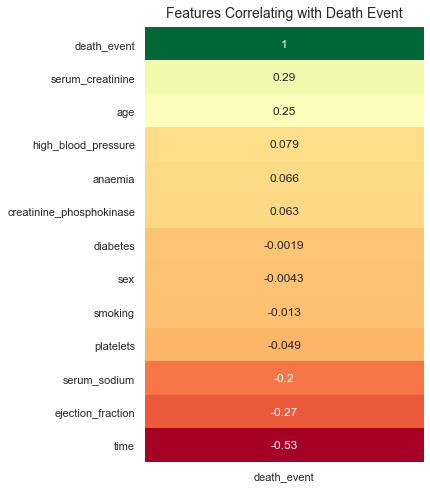

In [17]:
plt.figure(figsize=(5,8))
heatmap = sns.heatmap(df.corr()[['death_event']].sort_values(by='death_event', ascending=False), annot=True, cmap='RdYlGn', cbar=False)
heatmap.set_title('Features Correlating with Death Event', fontdict={'fontsize':14}, pad=10)
plt.show()

* **Important:** "time" column should not be included in the model!
* As soon as patient dies "time" will be stopped, this is an information you won't know beforehand in real life

# Model Development

## Set up X and y

In [18]:
X = df.drop(['death_event', 'time'], axis=1)

In [19]:
y = df['death_event']

In [20]:
print(X.shape)
print(y.shape)

(299, 11)
(299,)


## Check Feature Skew

In [21]:
from scipy import stats

def make_skew_df(df, numerical_cols):
    init_skews = []
    new_skews = []
    
    for col in numerical_cols:
        current_skew_val = df[col].skew()
        init_skews.append(current_skew_val)
        
        yeo, yeo_lmbda = stats.yeojohnson(df[col])
        new_skews.append(pd.Series(yeo).skew())
    
    skew_diffs = (np.abs(init_skews).round(2)-np.abs(new_skews).round(2))
    
    
    df_skew = pd.DataFrame({
        'Feature': numerical_cols, 
        'Skew_Before_Transformation': init_skews, 
        'Skew_After_Transformation': new_skews, 
        'Skew_Diff': skew_diffs
    }).sort_values(by='Skew_Diff', ascending=False).reset_index(drop=True)
    return df_skew

In [22]:
numerical_features = X.dtypes[X.dtypes != 'object'].index
df_skews = make_skew_df(X, numerical_features)

In [23]:
df_skews

,Feature,Skew_Before_Transformation,Skew_After_Transformation,Skew_Diff
0,creatinine_phosphokinase,4.463110,0.044225,4.42
1,serum_creatinine,4.455996,0.150380,4.31
2,platelets,1.462321,0.155360,1.30
3,serum_sodium,-1.048136,0.082305,0.97
4,ejection_fraction,0.555383,-0.006637,0.55
5,age,0.423062,-0.000746,0.42
6,anaemia,0.278261,0.278261,0.00
7,diabetes,0.333929,0.333929,0.00
8,high_blood_pressure,0.626732,0.626732,0.00
9,sex,-0.626732,-0.626732,0.00


**Let's visualize the effect of the skew transformation:**

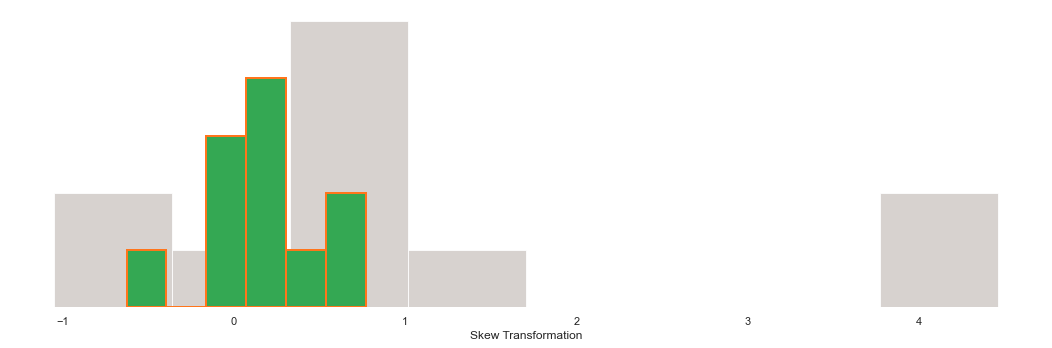

In [24]:
g = sns.FacetGrid(df_skews,
                  aspect=3,
                  height=5,
                 )
g.map(sns.distplot, 'Skew_Before_Transformation', kde=False, hist_kws={"alpha": 0.8, "color": "#CEC7C4"})
g.map(sns.distplot, 'Skew_After_Transformation', kde=False, hist_kws={"alpha": 1, "color": "#34A853", 'edgecolor': "#FF751B", "linewidth": 2})



g.despine(bottom=True, left=True)
g.set(yticks=[])
g.axes[0,0].set_xlabel('Skew Transformation')
plt.show()

* The gray bars represent the results before the transformation and the green bars after the transformation
* The yeo-johnson tranformation reduced the skew of a couple of features
* The skew of binary columns won't be affected
* The transformation step will be added later when we set up the pipeline

## Preprocessing Steps

In [25]:
from sklearn.preprocessing import PowerTransformer, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [26]:
non_binary_features = ['age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_sodium']

In [27]:
num_yeo_transformer=Pipeline(steps=[
    ('Scale', StandardScaler()),
    ('Skew', PowerTransformer(method='yeo-johnson', standardize=False))
])

In [28]:
preprocessor = ColumnTransformer(transformers=[
    ('num', num_yeo_transformer, non_binary_features)
], remainder='passthrough')

## Models To Test

In [29]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier

In [30]:
models=[
    ('XGBClassifier', XGBClassifier(random_state=42)),
    ('Gradient Boosting', GradientBoostingClassifier(random_state=42)),
    ('KNeighbors', KNeighborsClassifier()),
    ('SVM', SVC(random_state=42)),
    ('LogReg', LogisticRegression(random_state=42))
]

## Set up Pipeline and Evaluate Models

In [31]:
from sklearn.model_selection import cross_val_score, RepeatedStratifiedKFold
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as imb_Pipeline

* Instead of using sklearn's Pipeline we will use the Pipeline from imblearn
* Only with imblearn's pipeline we can include the SMOTE sampling technique correctly

In [32]:
def eval_model(model, splits, reps):
    cv = RepeatedStratifiedKFold(n_splits=splits, n_repeats=reps, random_state=42)
    acc_score = np.mean(cross_val_score(model, X, y, cv=cv, scoring='accuracy', n_jobs=-1))
    return acc_score

In [33]:
for model_name, model in models:
    pipe = imb_Pipeline(steps=[
        ('prep', preprocessor),
        ('sampling', SMOTE(sampling_strategy='minority', random_state=42)),
        ('model', model)
    ])
    result = eval_model(pipe, 10, 5)
    print(f'{model_name}: {round(result, 3)}')

XGBClassifier: 0.718
Gradient Boosting: 0.733
KNeighbors: 0.681
SVM: 0.735
LogReg: 0.722


# Tune Best Model

### Hyperparameter Grid and Cross Validation

In [34]:
from sklearn.model_selection import GridSearchCV, train_test_split

In [35]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [36]:
clf = SVC(random_state=42)

In [37]:
params = { 
    'model__C': [0.1, 1, 2, 10, 100],
    'model__kernel': ['rbf'],
    'model__gamma': [0.01, 0.05, 1, 10]
}

In [38]:
pipe = imb_Pipeline(steps=[
        ('prep', preprocessor),
        ('sampling', SMOTE(sampling_strategy='minority', random_state=7)),
        ('model', clf)
    ])

In [39]:
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=10, random_state=42)

## GridSearch

In [40]:
gridsearch = GridSearchCV(pipe, params, cv=cv, n_jobs=-1)

## Identify Best Hyperparameters 

Usually I would fit the gridsearch on the entire dataset, but I want to check the improved model on completely unseen data and check how the models performs.

In [41]:
gridsearch.fit(X_train, y_train)

GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=10, n_splits=5, random_state=42),
             estimator=Pipeline(steps=[('prep',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('num',
                                                                         Pipeline(steps=[('Scale',
                                                                                          StandardScaler()),
                                                                                         ('Skew',
                                                                                          PowerTransformer(standardize=False))]),
                                                                         ['age',
                                                                          'creatinine_phosphokinase',
                                                                          'ejection_fr

In [42]:
print(f'Best Paramters:\n\t-> {gridsearch.best_params_}')

Best Paramters:
	-> {'model__C': 2, 'model__gamma': 0.05, 'model__kernel': 'rbf'}


## Accuracy

In [43]:
gridsearch.best_score_

0.7591046099290779

## Test best model on unseen data (X_valid)

In [44]:
best_estimator = gridsearch.best_estimator_

In [45]:
y_pred = best_estimator.predict(X_valid)

## Review Prediction Results

In [46]:
from sklearn.metrics import confusion_matrix, classification_report

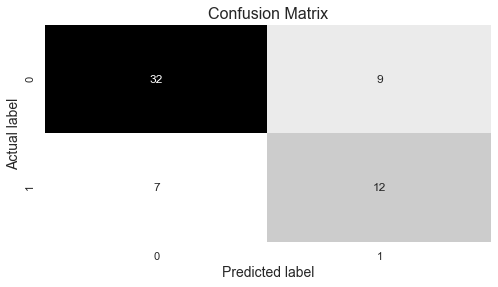

In [47]:
cnf_matrix = confusion_matrix(y_valid, y_pred)
plt.figure(figsize=(8,4))
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="binary" ,fmt='g', cbar=False)

plt.title('Confusion Matrix', fontsize=16)
plt.ylabel('Actual label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.show()

In [48]:
y_valid.value_counts().to_frame()

,death_event
0,41
1,19


In [49]:
print(classification_report(y_valid, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.78      0.80        41
           1       0.57      0.63      0.60        19

    accuracy                           0.73        60
   macro avg       0.70      0.71      0.70        60
weighted avg       0.74      0.73      0.74        60



# Final Thoughts 

* The goal of this model is to predict whether someone has heart failure or not
* It would be fatal if the model predicted that a patient was healthy but is not.
* So False Negatives have a much higher significance than False Positives
* If a patient is mistakenly identified with a heart failure, this can be validated and corrected later by further testing
* If the model would not detect a heart failure, it would cause damage
* Therefore I would prefer a model with minimal false negative rate even if it has lower precision (my model is not optimised for that)